## Ablation study: Models

#### Linear Model
- Data: 8 month of btcusdt-f
- Rolling training
    - 10d for training, the next 10d for testing
    - 20 features
- Summary table
    - average over 10d statistics
    - profit in bps after transaction cost, assuming no slippage and latency
    - quantile: x-quantile of y_pred
    - transaction cost: 3bps

In [29]:
# Training summary

,n_trades,prct_winning,avg_profit,std_profit,avg_winning,avg_losing,max_winning,max_losing,net_profit,gross_profit,gross_loss,profit_factor,max_consecutive_winning,max_consecutive_losing
quantile,,,,,,,,,,,,,,
0.00005,397.833333,0.663281,3.933199,10.442752,8.068914,-4.507610,65.907054,-38.981585,1542.108560,2112.040360,-569.931800,3.902061,15.625000,5.916667
0.00010,795.125000,0.590589,2.332769,8.795823,6.313047,-3.701418,67.633996,-42.965535,1809.585649,2960.125177,-1150.539528,2.610442,13.500000,8.208333
0.00100,7947.333333,0.256698,-0.942908,4.439555,3.459742,-2.519973,71.179385,-50.524756,-7600.671458,7172.801509,-14773.472968,0.486824,14.916667,46.416667
0.01000,79468.083333,0.067389,-2.085321,2.005512,2.295512,-2.405244,71.206477,-54.344866,-165871.378034,12389.005909,-178260.383943,0.070561,16.291667,533.625000
0.99000,79468.083333,0.075552,-2.045980,2.116643,2.289687,-2.403021,86.542648,-59.092477,-162776.302735,13746.258861,-176522.561596,0.079589,16.458333,441.166667
0.99900,7947.333333,0.276460,-0.837063,4.682080,3.455152,-2.528335,86.426208,-56.840163,-6786.749861,7626.438293,-14413.188153,0.534796,13.791667,49.208333
0.99990,795.125000,0.602767,2.428634,9.246301,6.303228,-3.740808,83.006792,-48.271244,1859.134291,2981.644186,-1122.509895,2.671123,14.333333,7.791667
0.99995,397.833333,0.669756,4.179036,11.305310,8.306533,-4.495887,82.764789,-42.358622,1599.657411,2160.214181,-560.556770,4.035265,15.000000,6.041667


In [24]:
# Testing summary

,n_trades,prct_winning,avg_profit,std_profit,avg_winning,avg_losing,max_winning,max_losing,net_profit,gross_profit,gross_loss,profit_factor,max_consecutive_winning,max_consecutive_losing
quantile,,,,,,,,,,,,,,
0.00005,383.500000,0.653571,3.421225,9.829964,7.477093,-4.333704,62.676417,-38.574412,1333.804334,1886.405090,-552.600756,3.751838,15.375000,5.666667
0.00010,766.458333,0.570939,1.849389,8.092415,5.769798,-3.503964,64.448697,-41.997749,1428.922351,2543.714957,-1114.792606,2.335789,13.250000,8.375000
0.00100,7660.875000,0.240027,-1.126478,4.088950,3.191487,-2.520935,66.514714,-48.612823,-8622.692178,6021.370072,-14644.062250,0.409116,14.000000,54.125000
0.01000,76604.125000,0.063493,-2.115462,1.888527,2.152451,-2.408726,69.656474,-52.406774,-162064.920468,10834.974308,-172899.894776,0.062187,15.750000,523.875000
0.99000,76604.125000,0.070263,-2.076238,1.956983,2.141149,-2.397316,81.131678,-54.416332,-159049.147196,11737.472531,-170786.619727,0.069112,15.208333,617.375000
0.99900,7660.875000,0.260375,-0.971142,4.208203,3.150362,-2.456393,80.523023,-51.077709,-7461.047657,6417.664793,-13878.712450,0.467587,11.750000,116.541667
0.99990,766.458333,0.590612,2.003180,8.513179,5.693235,-3.533985,79.989009,-43.239984,1527.724828,2586.205831,-1058.481004,2.479090,13.333333,8.041667
0.99995,383.500000,0.657408,3.450312,10.507906,7.435479,-4.426767,78.344422,-40.527160,1325.769123,1869.910468,-544.141345,3.704366,13.333333,6.166667


#### Neural Model
- TBD: rolling training

In [8]:
# Training summary

100%|███████████████████████████████████████| 3701/3701 [00:52<00:00, 70.14it/s]


,quantile,n_trades,prct_winning,avg_profit,std_profit,avg_winning,avg_losing,max_winning,max_losing,net_profit,gross_profit,gross_loss,profit_factor,max_consecutive_winning,max_consecutive_losing
0,0.00005,1185,0.735021,8.161346,17.558414,14.103996,-8.322885,124.690155,-98.715065,9671.194743,12284.580681,-2613.385938,4.700638,30,11
1,0.00010,2369,0.712537,5.839712,14.519121,11.008341,-6.971808,124.690155,-98.715065,13834.278550,18582.079458,-4747.800909,3.913829,34,15
2,0.00100,23687,0.396167,-0.012416,6.781620,4.560087,-3.012372,124.690155,-98.715065,-294.096527,42791.855859,-43085.952386,0.993174,41,35
3,0.01000,236864,0.110346,-1.889110,2.830154,2.679852,-2.455810,124.690155,-98.715065,-447462.096395,70043.296328,-517505.392723,0.135348,43,369
4,0.99000,236864,0.108763,-1.852909,2.888084,2.761549,-2.416038,137.364273,-65.867798,-438887.351353,71143.030673,-510030.382026,0.139488,35,334
5,0.99900,23687,0.413054,0.066515,7.139744,4.633309,-3.147289,137.364273,-65.867798,1575.540092,45332.292315,-43756.752223,1.036007,33,25
6,0.99990,2369,0.683411,5.742860,15.960216,11.808379,-7.350574,137.364273,-65.867798,13604.835245,19117.765609,-5512.930364,3.467805,24,12
7,0.99995,1185,0.729958,8.607084,18.782207,15.015561,-8.715829,137.364273,-65.867798,10199.394767,12988.459941,-2789.065174,4.656922,29,6


In [9]:
# Testing summary

100%|███████████████████████████████████████| 1267/1267 [00:18<00:00, 68.18it/s]


,quantile,n_trades,prct_winning,avg_profit,std_profit,avg_winning,avg_losing,max_winning,max_losing,net_profit,gross_profit,gross_loss,profit_factor,max_consecutive_winning,max_consecutive_losing
0,0.00005,406,0.687192,5.052840,10.143661,9.861766,-5.511653,42.337452,-24.270496,2051.452904,2751.432810,-699.979906,3.930731,26,5
1,0.00010,811,0.663379,3.312172,9.529717,7.781912,-5.496328,47.650646,-89.858696,2686.171384,4186.668835,-1500.497450,2.790187,27,8
2,0.00100,8109,0.355778,-0.624163,4.931643,3.674078,-2.997904,54.523239,-89.858696,-5061.336890,10599.714944,-15661.051834,0.676820,29,36
3,0.01000,81088,0.082318,-2.078956,2.209701,2.459036,-2.486023,54.523239,-89.858696,-168578.360096,16414.063841,-184992.423937,0.088728,30,282
4,0.99000,81088,0.082343,-2.011597,2.012020,2.290396,-2.397621,41.341465,-65.933090,-163116.375067,15292.974676,-178409.349743,0.085718,28,326
5,0.99900,8109,0.355161,-0.554043,4.346784,3.307212,-2.680723,41.341465,-65.933090,-4492.731483,9524.770555,-14017.502038,0.679491,23,33
6,0.99990,811,0.655980,2.330540,7.906926,6.065595,-4.791499,41.341465,-65.933090,1890.068149,3226.896374,-1336.828225,2.413845,26,11
7,0.99995,406,0.704433,3.734314,9.026038,7.498635,-5.237316,41.341465,-65.933090,1516.131646,2144.609599,-628.477953,3.412386,14,6


In [15]:
# Testing simulator

-6.047598199653625
5.330335192680328
pnl: 2908.209345761512
number of trades: 388
mean pnl:  6.837329532076952
sharpe ratio: 64.14880788566435


(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   3.,  31., 113., 138.,  46.,  35.,  10.,  10.]),
 array([-88.39388084, -82.23620424, -76.07852764, -69.92085104,
        -63.76317444, -57.60549784, -51.44782124, -45.29014463,
        -39.13246803, -32.97479143, -26.81711483, -20.65943823,
        -14.50176163,  -8.34408503,  -2.18640842,   3.97126818,
         10.12894478,  16.28662138,  22.44429798,  28.60197458,
         34.75965118]),
 <BarContainer object of 20 artists>)

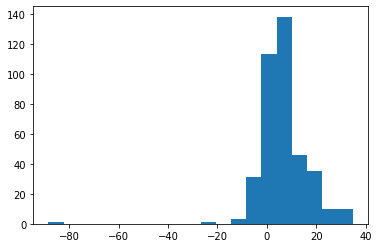

In [12]:
# distribution of profit per trade

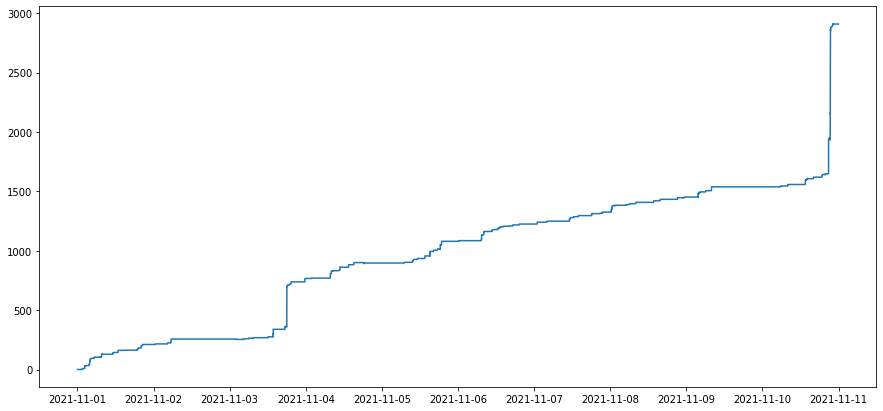

In [14]:
# pnl